### HDR: Number of countries per year

(Attribute, Year) $\rightarrow$ Number of countries

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

#### Set input/output folder

In [2]:
data_in  = '../data/HDR_1c_aggregate_attr_by_year'
data_out = '../data'

if not os.path.exists(data_out):
    os.mkdir(data_out)
    
plot_out = '../plots'

#### Read data

In [3]:
data = dict()

for file in os.listdir(data_in):
    filename = file.split('.')[0]
    data[filename] = pd.read_csv('{}/{}'.format(data_in, file),
                                 index_col='Country')

#### Concatenate data to a single data frame (year, attribute)

In [4]:
count = dict()

for year in sorted(list(data.keys())):
    count[year] = pd.Series(data[year].count())
    
    # which attributes have values for each of the 195 countries
    for attribute in count[year].index:
        if count[year][attribute] == 195:
            print(year, attribute)

1990 [Demography] Population, total (millions)
1990 [Demography] Population, urban (%)
1995 [Demography] Population, total (millions)
1995 [Demography] Population, urban (%)
2000 [Demography] Population, total (millions)
2000 [Demography] Population, urban (%)
2005 [Demography] Population, total (millions)
2005 [Demography] Population, urban (%)
2010 [Demography] Population, total (millions)
2010 [Demography] Population, urban (%)
2011 [Demography] Population, total (millions)
2011 [Demography] Population, urban (%)
2012 [Demography] Population, total (millions)
2012 [Demography] Population, urban (%)
2013 [Demography] Population, total (millions)
2013 [Demography] Population, urban (%)
2014 [Demography] Population, total (millions)
2014 [Demography] Population, urban (%)
2015 [Demography] Population, total (millions)
2015 [Demography] Population, urban (%)
2016 [Demography] Population, total (millions)
2016 [Demography] Population, urban (%)
2017 [Demography] Population, total (millio

In [5]:
count_df = pd.DataFrame()

for year in sorted(list(count.keys())):
    count_df = count_df.append(count[year], ignore_index=True)

In [6]:
count_df.index = range(1990, 1990 + len(count_df))

In [7]:
count_df = count_df.reindex(sorted(count_df.columns), axis=1).transpose()

#### Plot

In [8]:
list(pd.Series(os.listdir('../data/HDR_0')).str.split('.').str[0].sort_values())

['Demography',
 'Education',
 'Environmental Sustainability',
 'Gender',
 'Health',
 'Human Development Index (HDI)',
 'Human Security',
 'Income_composition of resources',
 'Inequality',
 'Mobility and communication',
 'Socio-economic sustainability',
 'Trade and financial flows',
 'Work, employment and vulnerability']

In [9]:
dim_list = ['Human Development Index \(HDI\)',
            'Demography',
            'Education',
            'Environmental Sustainability',
            'Gender',
            'Health',
            'Human Security',
            'Income_composition of resources',
            'Inequality',
            'Mobility and communication',
            'Socio-economic sustainability',
            'Trade and financial flows',
            'Work, employment and vulnerability']

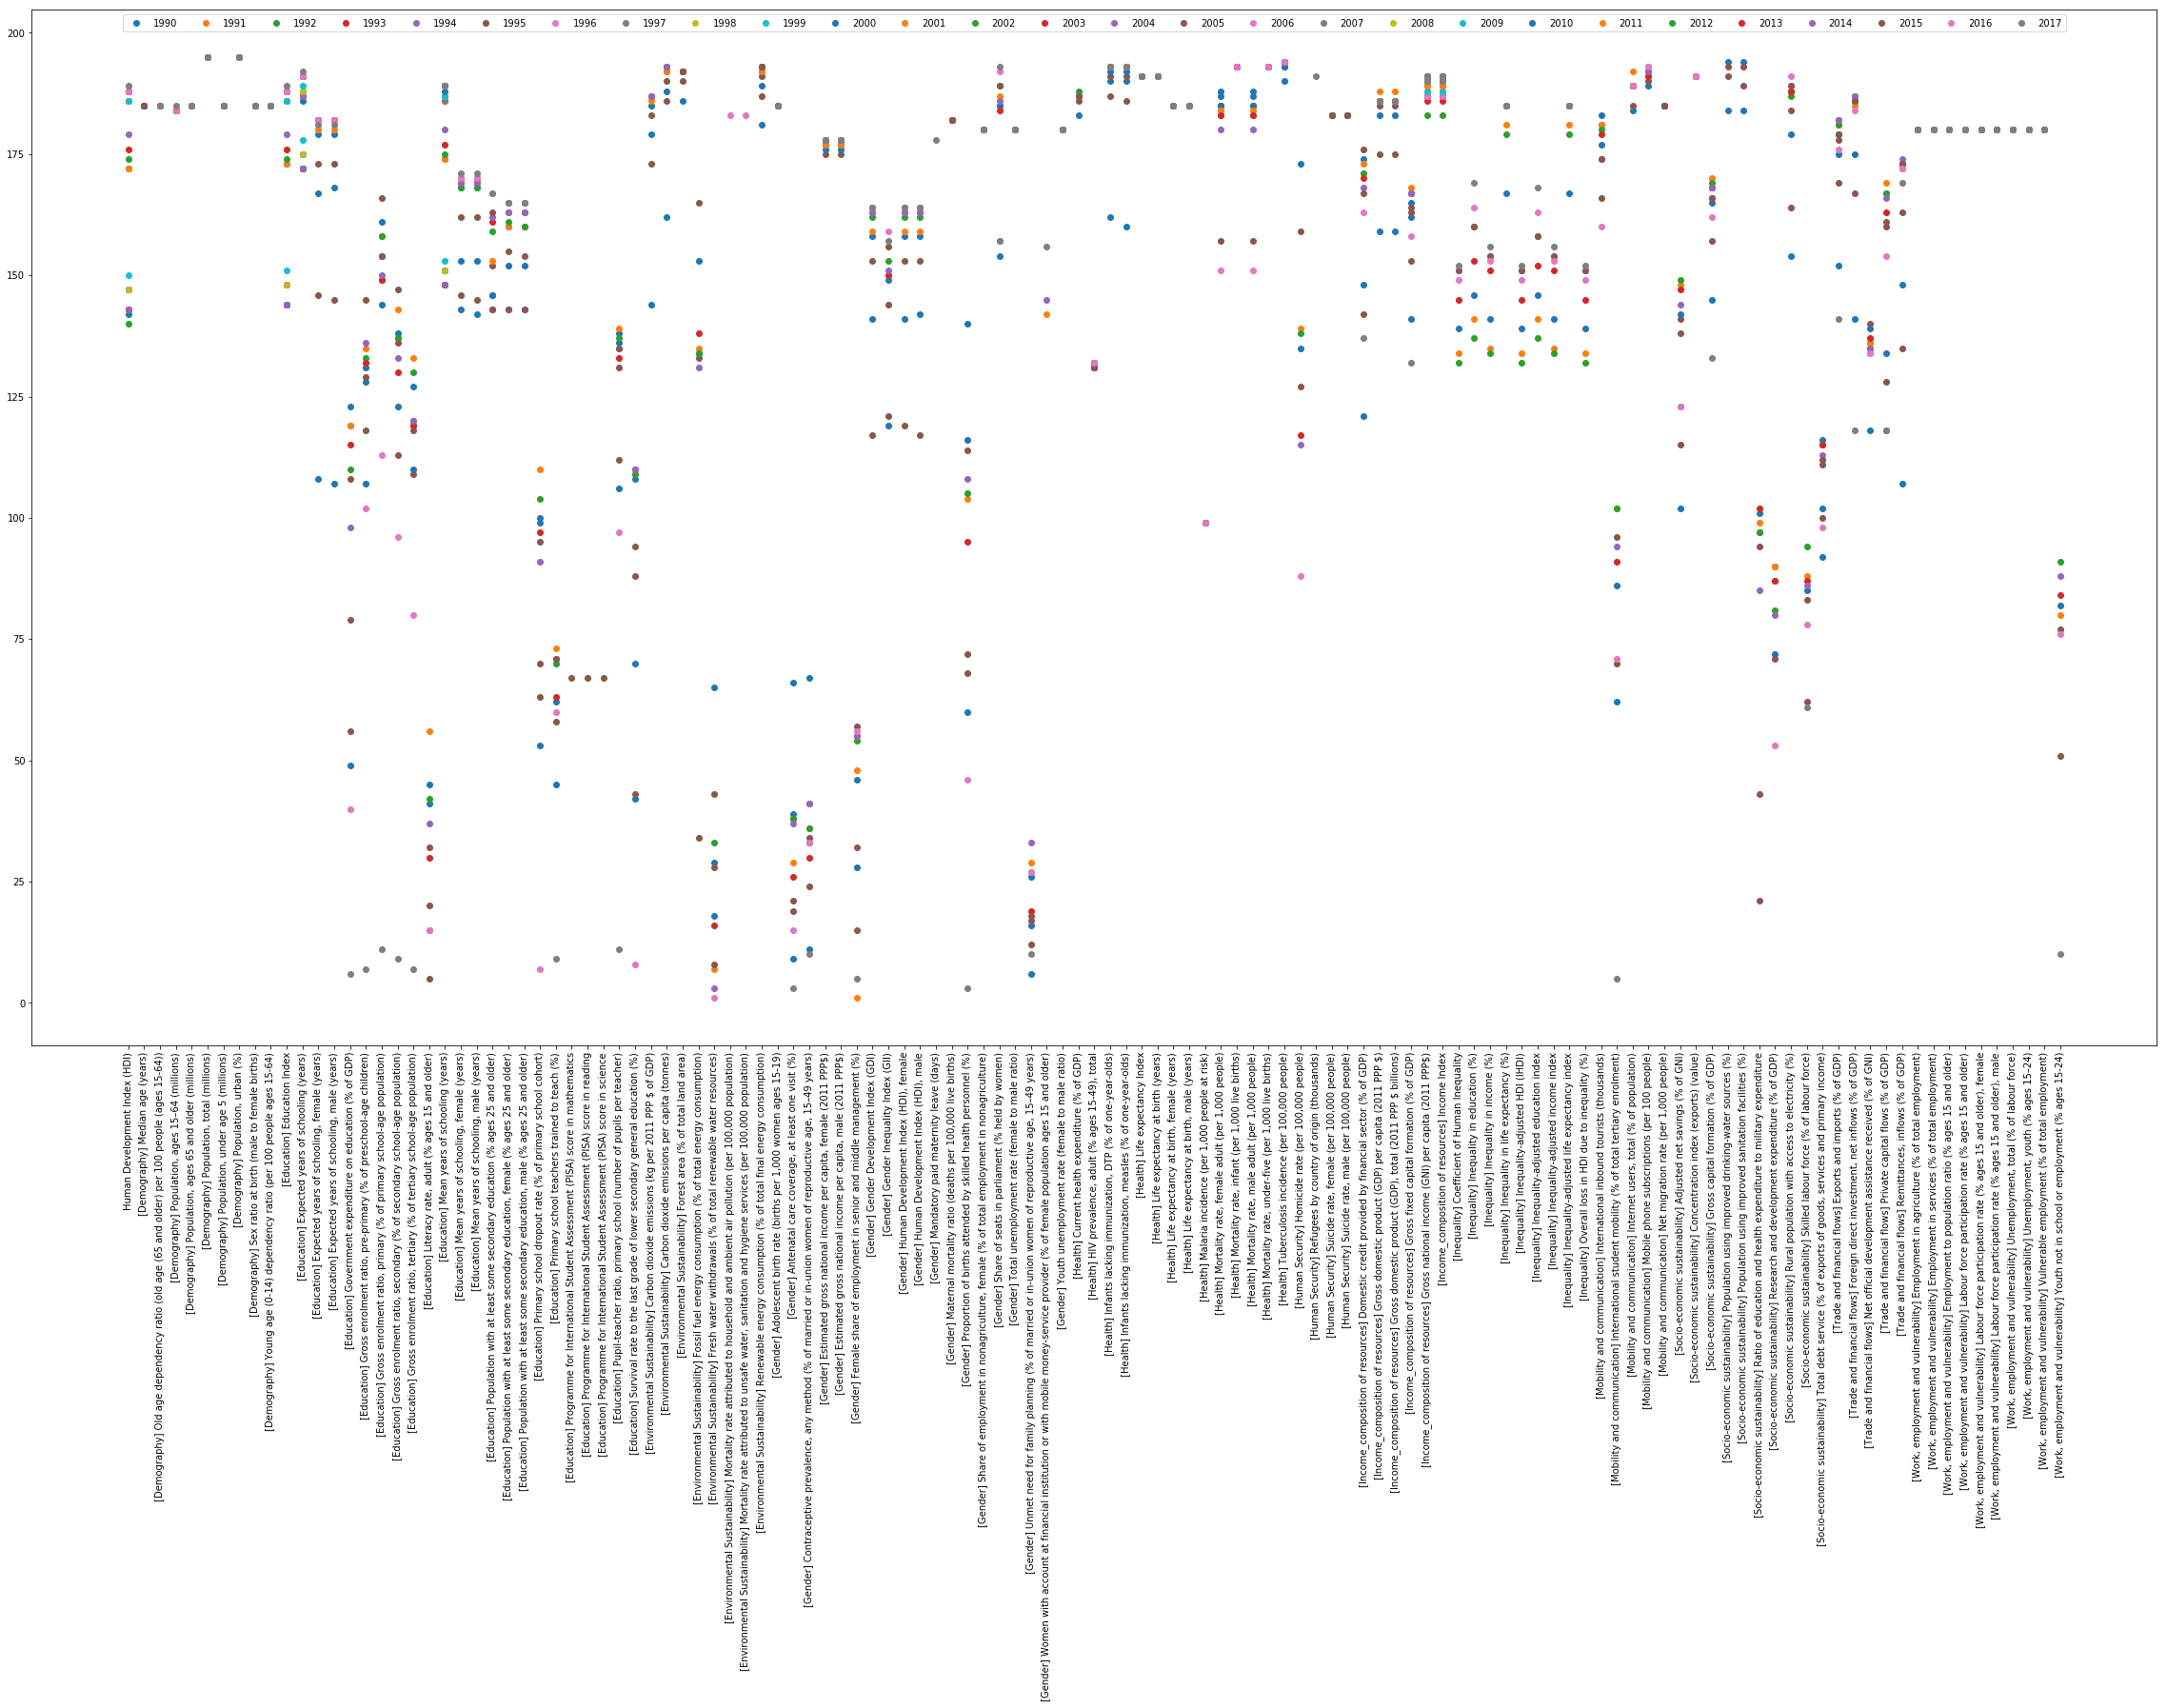

In [10]:
plt.figure(figsize=(40, 20))
plt.plot(count_df, 'o')
plt.xticks(count_df.index, rotation=90)
plt.legend(count_df.columns, loc=9, ncol=28)
plt.savefig(f'{plot_out}/HDR_attr_year__countries.png')
plt.show()

#### Output to csv format

In [11]:
count_df.to_csv(f'{data_out}/HDR_number_of_countries_per_year.csv',
                index_label='[Dimension] Attribute')